In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from config import apple_dir

: 

In [36]:
dataset = pd.read_csv(apple_dir, index_col=0)
dataset.set_index("Date", inplace=True)
train_data = dataset.loc["2017-03-01":"2023-01-01", :]
test_data = dataset.loc["2023-01-01":, :]
train_data.tail()

,Open,High,Low,Close,Volume,Dividends,Daily Return
Date,,,,,,,
2022-12-23,130.720412,132.218125,129.442364,131.658981,63814900,0.0,-0.279811
2022-12-27,131.179720,131.209673,128.523771,129.831772,69007800,0.0,-1.387835
2022-12-28,129.472318,130.830245,125.678116,125.847855,85438400,0.0,-3.068523
2022-12-29,127.794881,130.281083,127.535283,129.412415,75703700,0.0,2.832436
2022-12-30,128.214246,129.751892,127.235737,129.731918,76960600,0.0,0.246888


In [37]:
trainset = train_data.iloc[:,3:4].values
trainset

array([[ 32.79735184],
       [ 32.60262299],
       [ 32.79499435],
       ...,
       [125.84785461],
       [129.41241455],
       [129.73191833]])

In [38]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
training_scaled.shape

(1471, 1)

In [39]:
x_train = []
y_train = []
for i in range(60,training_scaled.shape[0]):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
x_train.shape

(1411, 60)

In [40]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1411, 60, 1)

In [41]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [42]:
regressor.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
45/45 [==============================] - 82s 348ms/step - loss: 0.0346
Epoch 2/20
45/45 [==============================] - 18s 402ms/step - loss: 0.0051
Epoch 3/20
45/45 [==============================] - 15s 326ms/step - loss: 0.0049
Epoch 4/20
45/45 [==============================] - 16s 363ms/step - loss: 0.0046
Epoch 5/20
45/45 [==============================] - 14s 311ms/step - loss: 0.0042
Epoch 6/20
45/45 [==============================] - 13s 300ms/step - loss: 0.0035
Epoch 7/20
45/45 [==============================] - 13s 299ms/step - loss: 0.0039
Epoch 8/20
45/45 [==============================] - 14s 306ms/step - loss: 0.0043
Epoch 9/20
45/45 [==============================] - 13s 278ms/step - loss: 0.0036
Epoch 10/20
45/45 [==============================] - 16s 348ms/step - loss: 0.0041
Epoch 11/20
45/45 [==============================] - 16s 355ms/step - loss: 0.0035
Epoch 12/20
45/45 [==============================] - 13s 289ms/step - loss: 0.0035
Epoch 13/20
4

In [43]:
real_stock_price = test_data.iloc[:,3:4].values
dataset_total = pd.concat((train_data['Close'],test_data['Close']),axis = 0)
real_stock_price

array([[124.87932587],
       [126.16736603],
       [124.82939911],
       [129.4223938 ],
       [129.95158386],
       [130.53070068],
       [133.28649902],
       [133.20661926],
       [134.55455017],
       [135.73275757],
       [135.00387573],
       [135.06378174],
       [137.6598053 ],
       [140.8948822 ],
       [142.31271362],
       [141.64373779],
       [143.74053955],
       [145.70751953],
       [142.78199768],
       [144.07002258],
       [145.20828247],
       [150.59008789],
       [154.26446533],
       [151.49868774],
       [154.41423035],
       [151.68840027],
       [150.63999939],
       [151.00999451],
       [153.8500061 ],
       [153.19999695],
       [155.33000183],
       [153.71000671],
       [152.55000305],
       [148.47999573],
       [148.91000366],
       [149.3999939 ],
       [146.71000671],
       [147.91999817],
       [147.41000366]])

In [44]:
len(dataset_total) - len(train_data)-60

-21

In [45]:
inputs = dataset_total[len(dataset_total) - len(test_data)-60:].values
inputs

array([144.96780396, 139.64477539, 139.97372437, 138.53829956,
       137.90032959, 142.5355835 , 137.94021606, 141.95741272,
       143.29315186, 143.40280151, 142.93429565, 146.80197144,
       148.97502136, 151.85585022, 148.87535095, 144.33981323,
       155.24505615, 152.85266113, 150.17120361, 144.56907654,
       138.43862915, 138.16903687, 138.70820618, 139.28733826,
       134.66438293, 146.64608765, 149.47177124, 148.05393982,
       149.81124878, 148.56315613, 150.49023438, 151.05935669,
       147.78434753, 149.95103455, 150.83970642, 147.88420105,
       144.00013733, 140.95478821, 147.80432129, 148.08389282,
       147.58465576, 146.40646362, 142.69213867, 140.72514343,
       142.43252563, 141.94328308, 144.26972961, 145.24822998,
       142.99168396, 136.29190063, 134.30493164, 132.16819763,
       132.09831238, 135.24349976, 132.02841187, 131.65898132,
       129.83177185, 125.84785461, 129.41241455, 129.73191833,
       124.87932587, 126.16736603, 124.82939911, 129.42

In [46]:
inputs = inputs.reshape(-1,1)
inputs

array([[144.96780396],
       [139.64477539],
       [139.97372437],
       [138.53829956],
       [137.90032959],
       [142.5355835 ],
       [137.94021606],
       [141.95741272],
       [143.29315186],
       [143.40280151],
       [142.93429565],
       [146.80197144],
       [148.97502136],
       [151.85585022],
       [148.87535095],
       [144.33981323],
       [155.24505615],
       [152.85266113],
       [150.17120361],
       [144.56907654],
       [138.43862915],
       [138.16903687],
       [138.70820618],
       [139.28733826],
       [134.66438293],
       [146.64608765],
       [149.47177124],
       [148.05393982],
       [149.81124878],
       [148.56315613],
       [150.49023438],
       [151.05935669],
       [147.78434753],
       [149.95103455],
       [150.83970642],
       [147.88420105],
       [144.00013733],
       [140.95478821],
       [147.80432129],
       [148.08389282],
       [147.58465576],
       [146.40646362],
       [142.69213867],
       [140

In [47]:
inputs = sc.transform(inputs)
inputs.shape

(99, 1)

In [48]:
x_test = []
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test.shape

(39, 60)

In [49]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(39, 60, 1)

In [50]:
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

2/2 [==============================] - 11s 78ms/step


array([[127.73322 ],
       [126.77906 ],
       [125.871254],
       [125.00966 ],
       [124.23425 ],
       [123.59149 ],
       [123.11888 ],
       [122.85578 ],
       [122.817986],
       [123.00494 ],
       [123.40277 ],
       [123.972084],
       [124.65902 ],
       [125.42685 ],
       [126.2679  ],
       [127.1838  ],
       [128.15848 ],
       [129.17868 ],
       [130.23827 ],
       [131.2963  ],
       [132.3136  ],
       [133.26456 ],
       [134.17555 ],
       [135.10532 ],
       [136.07082 ],
       [137.08423 ],
       [138.11426 ],
       [139.10498 ],
       [140.00487 ],
       [140.80014 ],
       [141.48584 ],
       [142.08089 ],
       [142.59224 ],
       [143.01309 ],
       [143.30269 ],
       [143.43323 ],
       [143.40308 ],
       [143.20877 ],
       [142.87227 ]], dtype=float32)

In [51]:
real_stock_price

array([[124.87932587],
       [126.16736603],
       [124.82939911],
       [129.4223938 ],
       [129.95158386],
       [130.53070068],
       [133.28649902],
       [133.20661926],
       [134.55455017],
       [135.73275757],
       [135.00387573],
       [135.06378174],
       [137.6598053 ],
       [140.8948822 ],
       [142.31271362],
       [141.64373779],
       [143.74053955],
       [145.70751953],
       [142.78199768],
       [144.07002258],
       [145.20828247],
       [150.59008789],
       [154.26446533],
       [151.49868774],
       [154.41423035],
       [151.68840027],
       [150.63999939],
       [151.00999451],
       [153.8500061 ],
       [153.19999695],
       [155.33000183],
       [153.71000671],
       [152.55000305],
       [148.47999573],
       [148.91000366],
       [149.3999939 ],
       [146.71000671],
       [147.91999817],
       [147.41000366]])

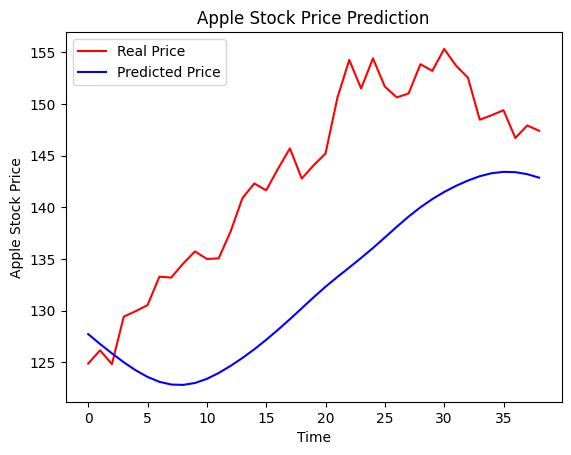

In [52]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()